# Contents <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Etapa 2. Data preprocessing](#data_preprocessing)
    * [2.1 Estilo del encabezado](#header_style)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Tipos de Datos](#type_data)
* [Etapa 3. Prueba de hipótesis](#hypotheses)
    * [3.1 Hipótesis 1: comparar el comportamiento del usuario en las dos ciudades](#activity)
    * [3.2 Hipótesis 2: música al principio y al final de la semana](#week)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
En este proyecto, se tiene que identificar patrones que determinen si un juego tiene éxito o no. Se estudiarán datos reales de la tienda online Ice que vende videojuegos por todo el mundo para probar las hipótesis de abajo y esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Objetivo: 
Probar dos hipótesis: 
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. 
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

### Etapas 
Los datos que contienen las reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas de juegos se almacenan en el archivo `/datasets/games.csv`. No hay ninguna información sobre la calidad de los datos así que necesitaremos examinarlos antes de probar las hipótesis. 

Primero, se evaluará la calidad de los datos y ver si los problemas son significativos. Entonces, durante el preprocesamiento de datos, tomaremos en cuenta los problemas más críticos.
 
El proyecto consistirá en tres etapas:
 1. Descripción de los datos
 2. Preprocesamiento de datos
 3. Prueba de hipótesis
 
[Volver a Contenidos](#back)

## Etapa 1. Descripción de los datos <a id='data_review'></a>

Abrir los datos y examinarlos.

Necesitaremos varias librerías durante todo el proyecto así que vamos a importarlas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

Leemos el archivo `games.csv` de la carpeta `/datasets/` y guardamos en la variable `df_ice`:

In [2]:
# leyendo el archivo y almacenándolo en df_ice
try:
    df_ice = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df_ice.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusiones <a id='data_review_conclusions'></a> 

**A primera vista encontramos:**
- **nombres de columnas en mayúsculas.**
- **6 columnas con valores ausentes.**
- **columnas sin tipos de datos necesarios.**

Imprimimos las 10 primeras filas de la tabla

In [3]:
# obteniendo las 10 primeras filas de la tabla df
df_ice.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Estilo del encabezado <a id='header_style'></a>

Reemplazamos los nombres de las columnas (ponerlos en minúsculas)

In [4]:
#pasando a minúscula con lower 
df_ice.columns = df_ice.columns.str.lower()

Comprobando el resultado. Imprimimos los nombres de las columnas

In [5]:
#comprobando el resultado: la lista de los nombres de las columnas
df_ice.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Valores ausentes <a id='missing_values'></a>
Primero encontramos el número de valores ausentes en la tabla. Para ello, utilizamos dos métodos pandas:

In [6]:
# calculando valores ausentes
df_ice.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

No todos los valores ausentes afectan la investigación. Pero en este proyecto trataremos de rellenar los datos hasta donde se permita para no sesgar mucho los resultados eliminando muchos valores.

Primero empecemos revisando los valores ausentes en `name` y `genre` que casualmente son 2 en ambas variables.

In [7]:
#filtramos df_ice para observar las filas con valores ausentes en 'name' y 'genre'
df_ice.query('name.isna() and genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ambas filas contienen demasiados valores ausentes, por lo que sería mejor eliminarlas con el método `dropna()`.

In [8]:
##eliminamos ambas filas con ausentes
df_ice.dropna(subset=['name', 'genre'], inplace=True)

In [9]:
#comprobamos valores ausentes
df_ice.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [10]:
#calculamos el porcentaje que representa estos valores ausentes en 'year_of_release'
nan_year = df_ice['year_of_release'].isna().sum() / len(df_ice)
f'El porcentaje de ausentes en "year_of_release" es: {nan_year}'

'El porcentaje de ausentes en "year_of_release" es: 0.016095255190570215'

Obervamos que representan cerca del 1% de los datos, así que será mejor eliminarlos.

In [11]:
#eliminando las filas con valores ausentes en la columna 'year_of_release'
df_ice.dropna(subset = ['year_of_release'], inplace=True)

In [12]:
#comprobamos valores ausentes
df_ice.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Ahora observemos que sucede con las columnas: `critic_score`, `user_score` y `rating`

In [13]:
#filtramos df_ice para observar las filas con valores ausentes en 'critic_score'
df_ice.query('critic_score.isna() and user_score.isna() and rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Revisando el dataframe filtrado podemos observar que contienen más de 6 mil filas con valores ausentes en las columnas: `critic_score`, `user_score` y `rating`, esto es demasiado para imputar o eliminar las filas por lo que será mejor dejarlo en blanco y seguir avanzando con el análisis.

### Tipos de datos

Convertir los datos en los tipos necesarios en las columnas:
    
- `year_of_release` y `user_score`

Para la columna `user_score`, primero debemos solucionar los valores 'to be determined', serán reemplazados por valores ausentes (Nan) ya que es más facil trabajar con este valor para valores TBD

In [14]:
#verificamos la distribución de valores
df_ice['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [15]:
#reemplazamos los valores 'tbd' por cero
df_ice.loc[df_ice['user_score']=='tbd', 'user_score'] = np.nan

In [16]:
#comprobando que funcionó el reemplazo
df_ice['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

En la columna `year_of_release` pasamos a 'int64' porque al tratarse de años no es necesario que esten con decimales como lo es el tipo 'float64'.

Mientras que en la columna `user_score` estamos pasando a tipo 'float64' porque actualmente tiene por tipo de dato 'object' y este no corresponde con valores númericos.

In [17]:
#convirtiendo las columnas a tipos de datos necesarios
df_ice['year_of_release'] = df_ice['year_of_release'].astype('int64')
df_ice['user_score'] = df_ice['user_score'].astype('float64')

In [18]:
#comprobando la conversión de datos
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Vamos a calcular las ventas totales para cada juego y colocar estos valores en una columna separada.

In [19]:
#agregamos una nueva columna llamada 'total_income'
df_ice['total_income'] = df_ice['na_sales'] + df_ice['eu_sales'] + df_ice['jp_sales'] + df_ice['other_sales']

In [20]:
#comprobamos la nueva columna
df_ice

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


La nueva columna representa la suma de las ventas en todas las regiones (Norteamérica, Europa, Japón y otros países).

Ahora vamos a averiguar cuántos juegos fueron lanzados en diferentes años, para esto agruparemos por `year_of_release` y contaremos por `name`, y guardaremos el resultado en la variable 'df_region'.

    year_of_release  count   percent
0              1980      9  0.054731
1              1981     46  0.279737
2              1982     36  0.218925
3              1983     17  0.103381
4              1984     14  0.085137
5              1985     14  0.085137
6              1986     21  0.127706
7              1987     16  0.097300
8              1988     15  0.091219
9              1989     17  0.103381
10             1990     16  0.097300
11             1991     41  0.249331
12             1992     43  0.261494
13             1993     60  0.364875
14             1994    121  0.735831
15             1995    219  1.331793
16             1996    263  1.599368
17             1997    289  1.757480
18             1998    379  2.304792
19             1999    338  2.055461
20             2000    350  2.128436
21             2001    482  2.931160
22             2002    829  5.041352
23             2003    775  4.712965
24             2004    762  4.633909
25             2005    939  5.710289
2

<BarContainer object of 37 artists>

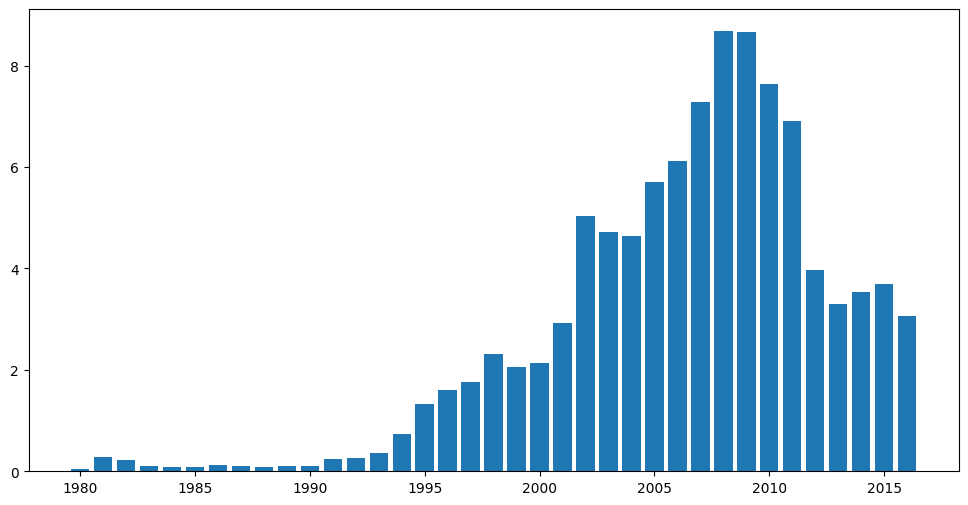

In [21]:
#hacemos un groupby por 'year_of_release'
#creamos una columna para observar la proporción de los datos
df_region = df_ice.groupby('year_of_release')['name'].agg({'count'}).reset_index()
df_region['percent'] = 100*(df_region['count'] / df_region['count'].sum())
print(df_region)
#usando un gráfico para ilustrar nuestra tabla
plt.figure(figsize = (12, 6))
plt.bar(df_region['year_of_release'], df_region['percent'])

Revisando la tabla y gráfica podemos identificar datos muy pequeños, por debajo del 1%, así como también datos que superan el 3% que podemos decir son significativos.

Vamos a analizar como varían las ventas de una plataforma a otra, para esto agruparemos nuestro dataset principal(df_ice) por `platform` y sumaremos en `total_income`, y guardaremos el resultado en 'df_platform'.

In [22]:
#hacemos un groupby por 'platform'
#ordenamos los datos de forma descendente y aplicamos un head()
df_platform = df_ice.groupby('platform')['total_income'].agg({'sum'}).reset_index()
df_platform.sort_values(by='sum', ascending=False).head(5)

,platform,sum
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Identificamos las 5 plataformas que lideran las ventas totales, ahora construiremos una distribución basada en los datos de cada año. Para esto, haremos un query en nuestro dataset principal y lo guardaremos en 'df_platform_dis'.

In [23]:
#filtramos por 'platform' con las 5 que lideran las ventas
df_platform_dis = df_ice.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS"')
df_platform_dis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Para construir la distribución por años agruparemos por `platform` y `year_of _release`, y haremos una suma en `total_income`

Guardaremos el resultado en 'df_platf_dis_total'

In [24]:
#hacemos un pivot_table por 'platform' y 'year_of_release'
df_platf_dis_total = df_platform_dis.pivot_table(index='year_of_release', columns='platform', values='total_income', aggfunc='sum')
df_platf_dis_total = df_platf_dis_total.reset_index()
df_platf_dis_total

platform,year_of_release,DS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN
1,2000,NaN,39.17,NaN,NaN,NaN
2,2001,NaN,166.43,NaN,NaN,NaN
3,2002,NaN,205.38,NaN,NaN,NaN
4,2003,NaN,184.31,NaN,NaN,NaN
5,2004,17.27,211.81,NaN,NaN,NaN
6,2005,130.14,160.66,NaN,NaN,8.25
7,2006,119.81,103.42,20.96,137.15,51.62
8,2007,146.94,75.99,73.19,152.77,95.41
9,2008,145.31,53.90,118.52,171.32,135.26


<BarContainer object of 18 artists>

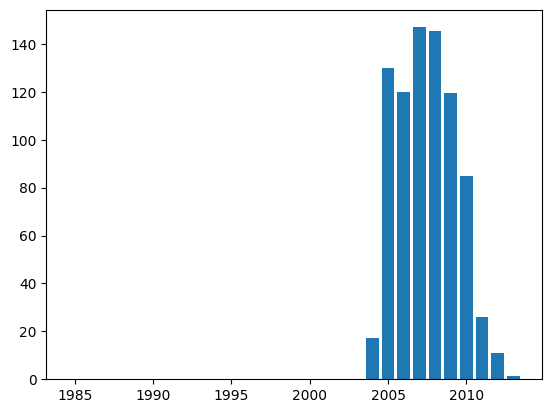

In [25]:
#gráfico de la distribución de la plataforma 'DS' durante los años
plt.bar(df_platf_dis_total['year_of_release'], df_platf_dis_total['DS'])

<BarContainer object of 18 artists>

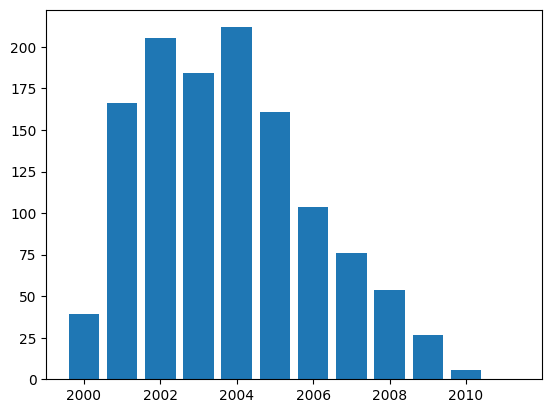

In [26]:
#gráfico de la distribución de la plataforma 'PS2' durante los años
plt.bar(df_platf_dis_total['year_of_release'], df_platf_dis_total['PS2'])

<BarContainer object of 18 artists>

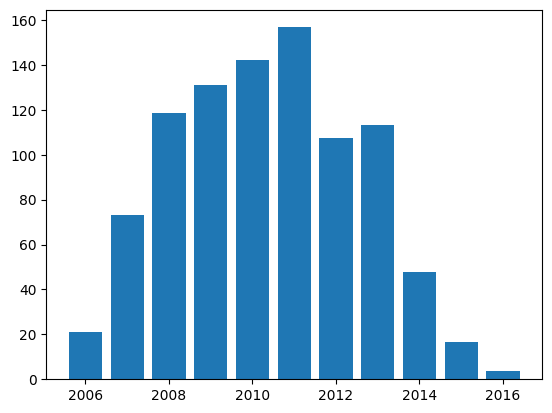

In [27]:
#gráfico de la distribución de la plataforma 'PS3' durante los años
plt.bar(df_platf_dis_total['year_of_release'], df_platf_dis_total['PS3'])

<BarContainer object of 18 artists>

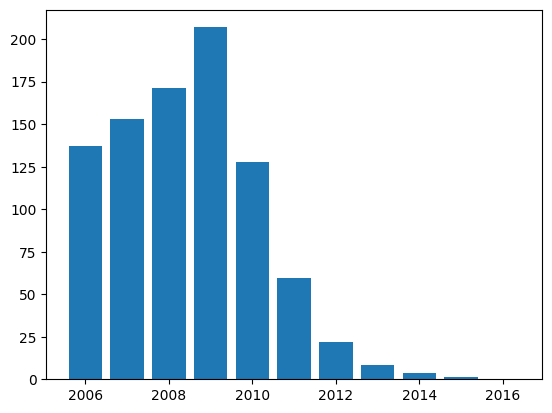

In [28]:
#gráfico de la distribución de la plataforma 'Wii' durante los años
plt.bar(df_platf_dis_total['year_of_release'], df_platf_dis_total['Wii'])

<BarContainer object of 18 artists>

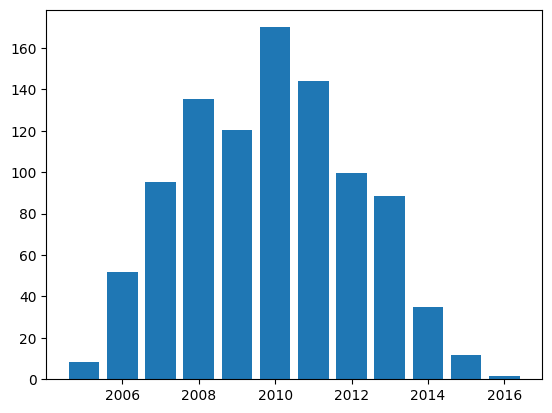

In [29]:
#gráfico de la distribución de la plataforma 'X360' durante los años
plt.bar(df_platf_dis_total['year_of_release'], df_platf_dis_total['X360'])

Las plataformas tienen una distribución que cumple con tener pocas ventas cuando aparecen, llegan a un pico y luego descienden.

In [30]:
#hacemos un groupby por 'platform' y hallamos el mínimo y máximo
#creamos una columna con el tiempo de vida
df_platf_time = df_platform_dis.groupby('platform')['year_of_release'].agg({'min', 'max'}).reset_index()
df_platf_time['dif'] = df_platf_time['max'] - df_platf_time['min']
df_platf_time

,platform,min,max,dif
0,DS,1985,2013,28
1,PS2,2000,2011,11
2,PS3,2006,2016,10
3,Wii,2006,2016,10
4,X360,2005,2016,11


Analizando los valores, concluimos que en general las plataformas tienen un tiempo de vida de 10 años

Necesitamos construir un modelo para el año 2017, para esto determinaremos un período donde tomar datos. Basados en nuestro análisis anterior, el período debe ser máximo de 5 años del 2012 hasta 2016, pero esto sigue siendo un periodo un poco amplio por lo que trataremos con un periodo de 3 años, es decir, del 2014 hasta el 2016.

Trabajaremos con los datos relevantes, es decir, debemos ignorar los datos anteriores a 2014.

In [31]:
#redefinimos df_ice para ignorar los datos que no deseamos
df_ice = df_ice[df_ice['year_of_release'] >= 2014]

In [32]:
#comprobando los resultados
df_ice['year_of_release'].value_counts()

2015    606
2014    581
2016    502
Name: year_of_release, dtype: int64

Agruparemos por `platform` y mostraremos las ventas globales de todos los juegos y guardaremos en la variable 'df_plat_2014'

             sum
platform        
PSP         0.36
Wii         5.07
PSV        22.40
PC         27.05
WiiU       42.98
X360       48.22
PS3        68.18
3DS        86.68
XOne      140.36
PS4       288.15


<AxesSubplot: ylabel='sum'>

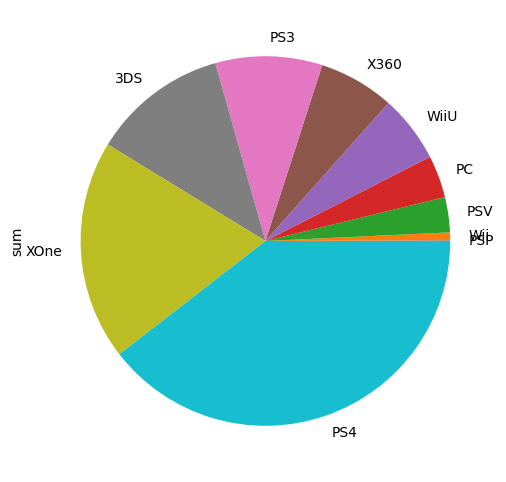

In [33]:
#agrupamos por 'platform'
df_plat_2014 = df_ice.groupby('platform')['total_income'].agg({'sum'}).sort_values(by='sum')
df_plat_2014
print(df_plat_2014)
#gráfico de la distribución de las ventas por plataformas
df_plat_2014.plot.pie(y='sum', figsize=(18,6), legend=False)

De esta agrupación de datos, podemos identificar a las plataformas que son líderes en ventas:
- PS3
- X360
- PS4
- 3DS
- XOne

In [34]:
#agrupamos por 'platform' y 'year_of_release'
df_plat_year = df_ice.pivot_table(index='year_of_release', columns='platform', values='total_income', aggfunc='sum')
df_plat_year = df_plat_year.reset_index()
df_plat_year

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


([<matplotlib.axis.XTick at 0x20b0dca81d0>,
 [Text(2014, 0, '2014'), Text(2015, 0, '2015'), Text(2016, 0, '2016')])

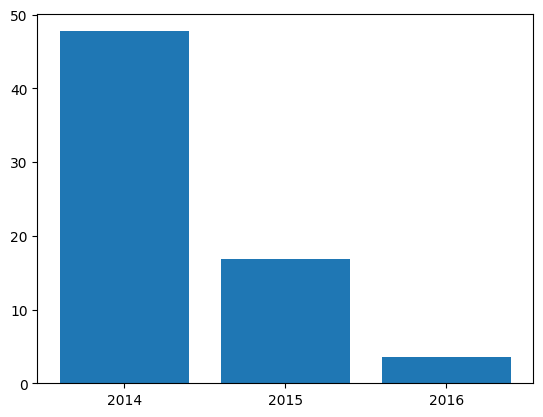

In [35]:
#gráfico de la distribución de los datos
plt.bar(df_plat_year['year_of_release'], df_plat_year['PS3'])
plt.xticks(range(2014, 2017 ,1))

([<matplotlib.axis.XTick at 0x20b0df778d0>,
 [Text(2014, 0, '2014'), Text(2015, 0, '2015'), Text(2016, 0, '2016')])

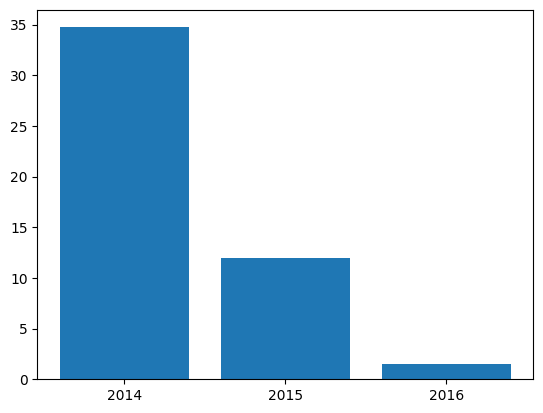

In [36]:
#gráfico de la distribución de los datos
plt.bar(df_plat_year['year_of_release'], df_plat_year['X360'])
plt.xticks(range(2014, 2017 ,1))

([<matplotlib.axis.XTick at 0x20b0e11f410>,
 [Text(2014, 0, '2014'), Text(2015, 0, '2015'), Text(2016, 0, '2016')])

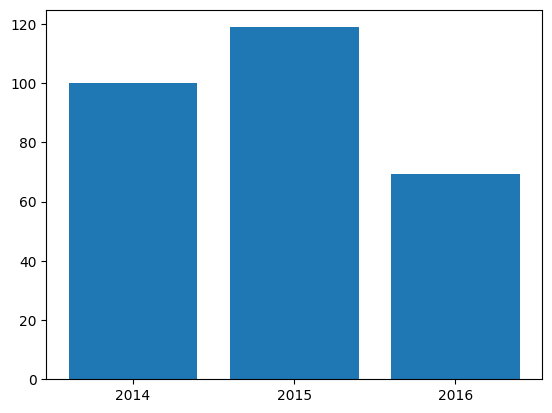

In [37]:
#gráfico de la distribución de los datos
plt.bar(df_plat_year['year_of_release'], df_plat_year['PS4'])
plt.xticks(range(2014, 2017 ,1))

([<matplotlib.axis.XTick at 0x20b0e133cd0>,
 [Text(2014, 0, '2014'), Text(2015, 0, '2015'), Text(2016, 0, '2016')])

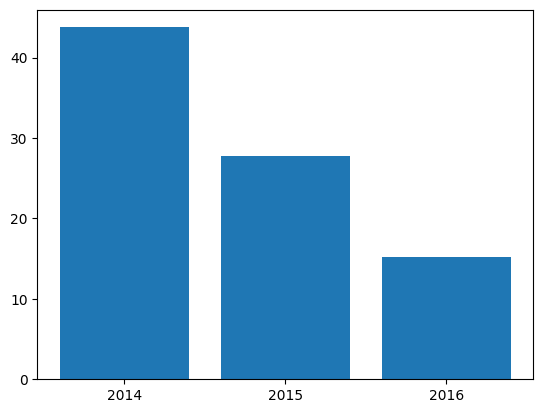

In [38]:
#gráfico de la distribución de los datos
plt.bar(df_plat_year['year_of_release'], df_plat_year['3DS'])
plt.xticks(range(2014, 2017 ,1))

([<matplotlib.axis.XTick at 0x20b0f306950>,
 [Text(2014, 0, '2014'), Text(2015, 0, '2015'), Text(2016, 0, '2016')])

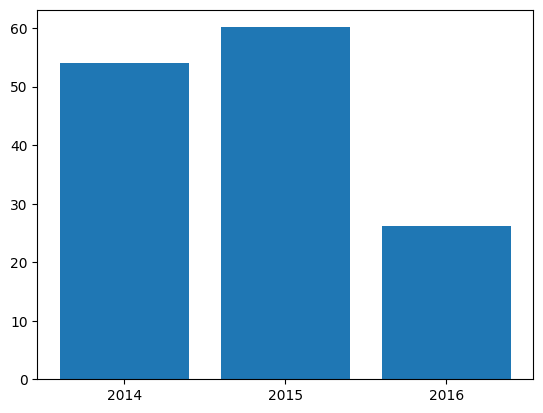

In [39]:
#gráfico de la distribución de los datos
plt.bar(df_plat_year['year_of_release'], df_plat_year['XOne'])
plt.xticks(range(2014, 2017 ,1))

De las plataformas líderes en ventas, definidas anteriormente, vamos a ver cuáles están creciendo y cuáles están reduciendo en ventas, en el período 2014 - 2016:
- PS3 - se reduce
- X360 - se reduce
- PS4 - se reduce
- 3DS - se reduce
- XOne - se reduce

Cabe mencionar que en la descripción del proyecto, los datos del 2016 están incompletos, por lo que puede haber una probabilidad de que algunas plataformas nuevas no se estén reduciendo en 2016, incluso podrían estar en crecimiento. Después de hacer la aclaración, siguiendo el análisis con los datos que tenemos, las plataformas que lideran las ventas se están reduciendo, por lo que para elegir plataformas potencialmente rentables veremos que hasta el 2015 presentaban su pico de ventas, y estos serían: PS4 y XOne.

Vamos a crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma, para ver qué tan significativas son las diferencias en las ventas

(0.0, 5.0)

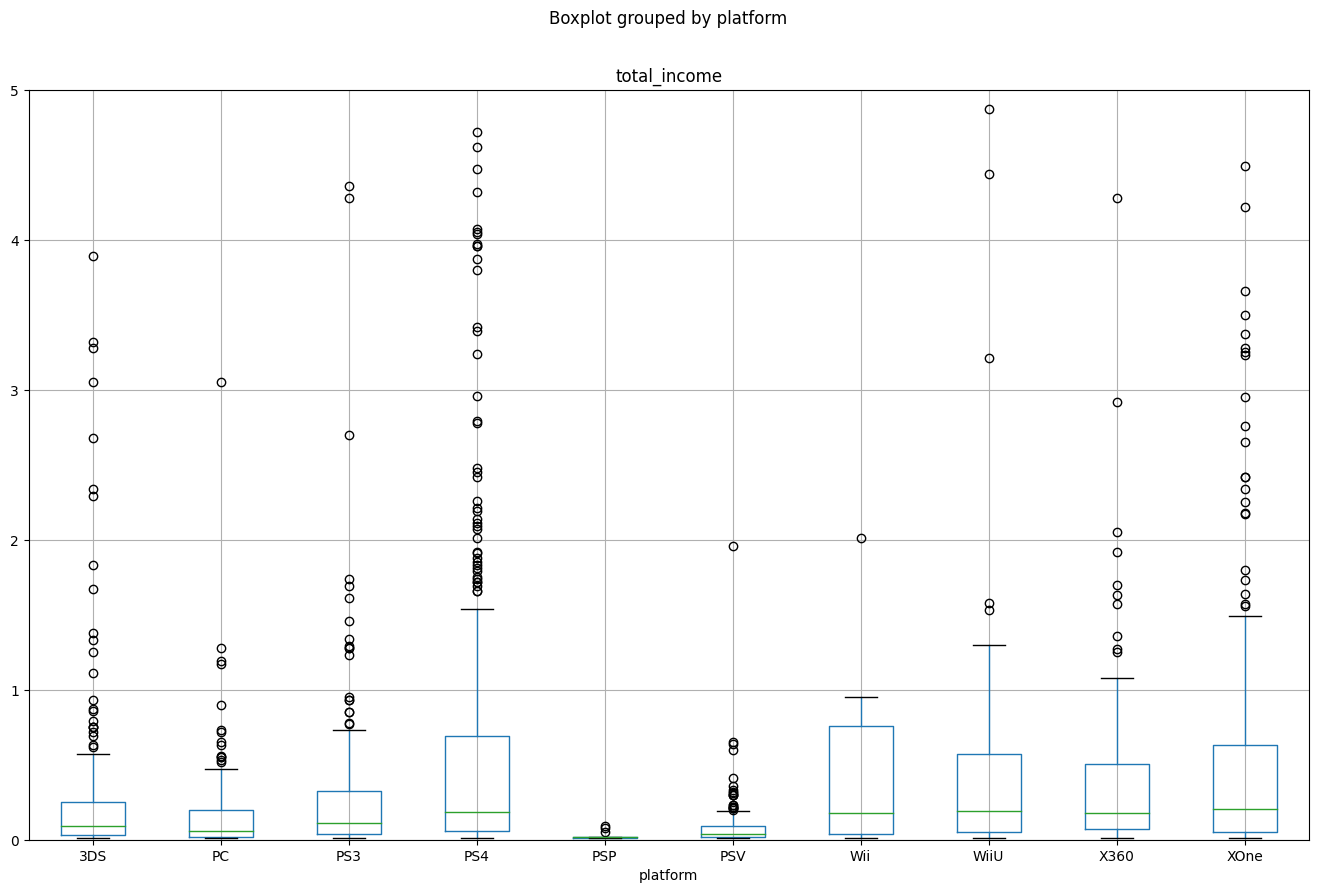

In [40]:
#creando diagramas de caja en df_ice
df_ice.boxplot(column='total_income', by='platform', figsize=(16,10))
plt.ylim(0, 5)

Las diferencias en las ventas son significativas, en cada plataforma podemos observar que el rango intercuartílico varía, eso quiere decir que hay mucha dispersión en los datos. Con respecto a las ventas promedio por plataforma, podemos hablar de una igualdad en la mayoría de las plataformas alrededor de 0.2 millones de dólares estadounidenses.

Ahora estudiaremos como las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS4), para esto crearemos un gráfico de dispersión para estudiar la relación entre las variables.

<AxesSubplot: xlabel='user_score', ylabel='total_income'>

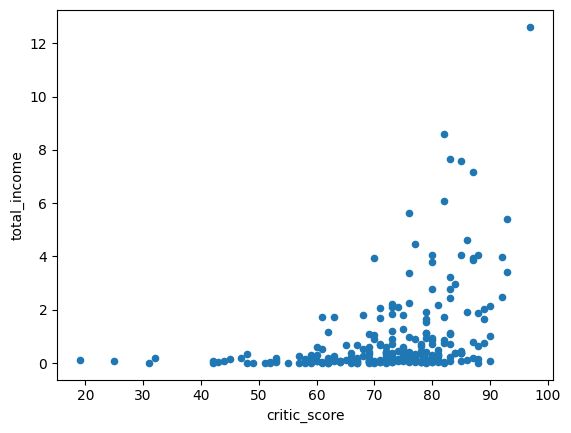

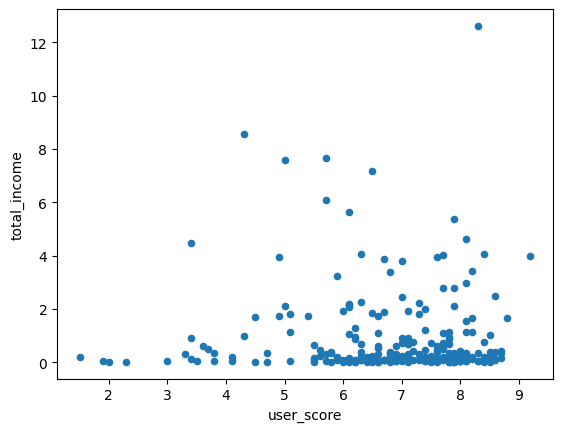

In [41]:
#creando un gráfico de dispersión en 'critic_score' 'user_score' y platform=="PS4"
df_ps4 = df_ice.query('platform=="PS4"')
df_ps4.plot(x='critic_score', y='total_income', kind='scatter')
df_ps4.plot(x='user_score', y='total_income', kind='scatter')

In [42]:
#hallando la correlación entre 'critic_score'-'total_income' y 'user_score'-'total_income'
print('La correlación entre las reseñas de profesionales y las ventas', df_ps4['critic_score'].corr(df_ps4['total_income']))
print('La correlación entre las reseñas de usuarios y las ventas', df_ps4['user_score'].corr(df_ps4['total_income']))

La correlación entre las reseñas de profesionales y las ventas 0.4026614106810409
La correlación entre las reseñas de usuarios y las ventas -0.04013158947269733


Revisando los gráficos de dispersión y luego de calcular la correlación entre las reseñas y las ventas, podemos concluir que una correlación de 0.4 implica una conexión entre las reseñas de los profesionales y las ventas, mientras que una correlación de 0.02 puede significar que, o no hay, o que hay una compleja conexión no lineal entre las reseñas de los usuarios y las ventas.

Vamos a comparar las ventas de los mismos juegos en otras plataformas, es decir los juegos que se vendieron tanto en PS4 como en XOne

In [43]:
#combinando datos con merge en 'name'
df_xone = df_ice.query('platform=="XOne"')
df_xone = df_xone[['name','platform', 'total_income']]
df_ps4 = df_ps4[['name','platform', 'total_income']]
df_xone = df_xone.merge(df_ps4, on='name')
df_pc = df_ice.query('platform=="PC"')
df_pc = df_pc[['name','platform', 'total_income']]
df_xone = df_xone.merge(df_pc, on='name')
df_xone

,name,platform_x,total_income_x,platform_y,total_income_y,platform,total_income
0,Call of Duty: Black Ops 3,XOne,7.39,PS4,14.63,PC,0.26
1,Grand Theft Auto V,XOne,5.47,PS4,12.62,PC,1.17
2,Call of Duty: Advanced Warfare,XOne,5.26,PS4,7.66,PC,0.41
3,Fallout 4,XOne,4.22,PS4,7.17,PC,1.28
4,Star Wars Battlefront (2015),XOne,3.66,PS4,7.98,PC,0.55
...,...,...,...,...,...,...,...
82,Valentino Rossi: The Game,XOne,0.03,PS4,0.07,PC,0.01
83,The Technomancer,XOne,0.02,PS4,0.07,PC,0.01
84,Rugby World Cup 2015,XOne,0.02,PS4,0.06,PC,0.01
85,The Crew: Wild Run,XOne,0.02,PS4,0.09,PC,0.02


<BarContainer object of 3 artists>

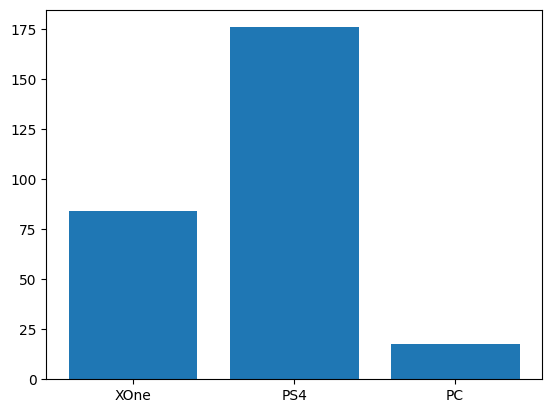

In [44]:
#graficando los totales por plataforma
fig, ax = plt.subplots()
ax.bar(['XOne', 'PS4', 'PC'], [df_xone['total_income_x'].sum(), df_xone['total_income_y'].sum(), df_xone['total_income'].sum()])

In [45]:
print('ventas en XOne:', df_xone['total_income_x'].sum())
print('ventas en PS4:',df_xone['total_income_y'].sum())
print('ventas en PC:',df_xone['total_income'].sum())

ventas en XOne: 83.99000000000001
ventas en PS4: 175.85999999999999
ventas en PC: 17.530000000000005


Las ventas en PS4 fueron casi el doble de las ventas en XOne para los mismos juegos.

Echemos un vistazo a la distribución general de los juegos por género, por lo que mejor sería encontrar un género de juegos que genere altos ingresos constantemente; para hacerlo, debemos considerar las ventas promedio.

(0.0, 6.0)

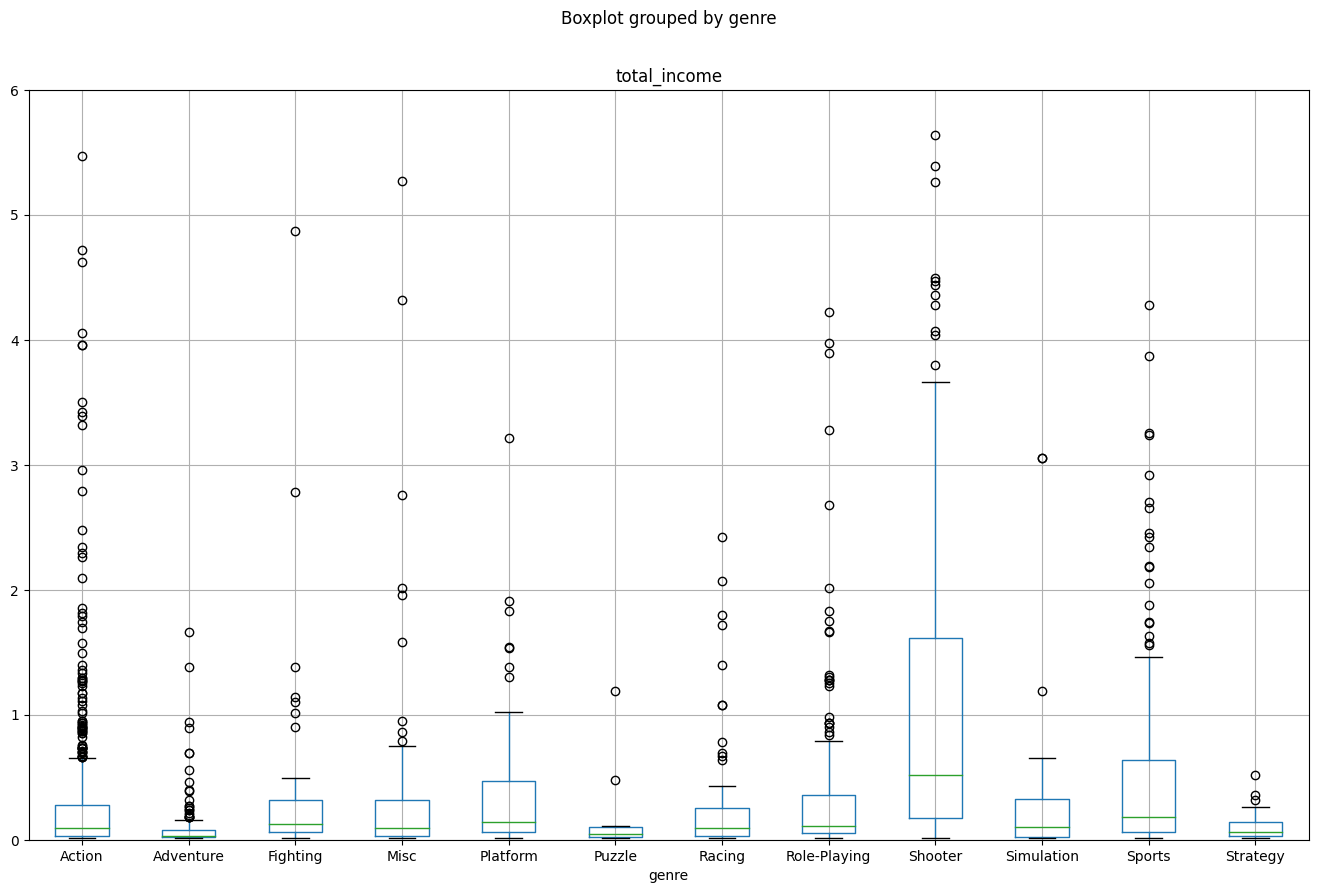

In [46]:
#graficando diagramas de caja del 'total_income' desglosado por género
df_ice.boxplot(column='total_income', by='genre', figsize=(16,10))
plt.ylim(0, 6)

Como podemos observar el género de juegos que genera altos ingresos constantemente es 'Shooter'.

Ahora vamos a realizar un análisis por región, tanto para Norteamérica, Europa y Japón, para cada una de ellas vamos a determinar:
- Las cinco plataformas principales.
- Los cinco géneros principales.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

            sum  market_share
platform                     
PS4       98.61          0.39
XOne      81.27          0.32
X360      28.30          0.11
3DS       22.64          0.09
PS3       22.05          0.09


<AxesSubplot: ylabel='market_share'>

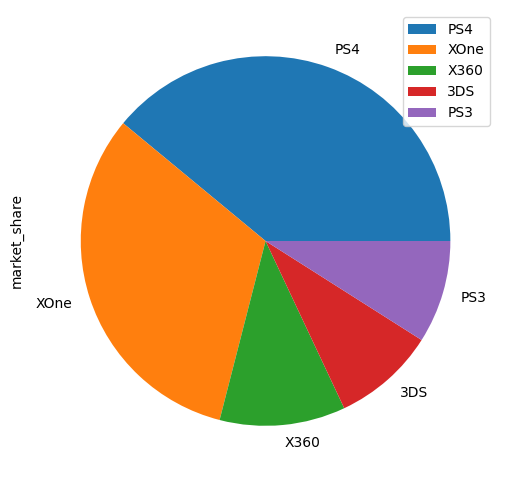

In [47]:
#hallamos las 5 plataformas principales en Norteamérica
df_reg_na = df_ice.groupby('platform')['na_sales'].agg({'sum'})
df_reg_na = df_reg_na.sort_values(by='sum', ascending=False)
df_reg_na = df_reg_na.head()
df_reg_na['market_share'] = round(df_reg_na['sum'] / df_reg_na['sum'].sum(), 2)
print(df_reg_na)
#graficando la distribución de la cuota de mercado
df_reg_na.plot.pie(y='market_share', figsize=(18,6))

             sum  market_share
platform                      
PS4       130.04          0.55
XOne       46.25          0.20
PS3        25.54          0.11
PC         17.97          0.08
3DS        16.12          0.07


<AxesSubplot: ylabel='market_share'>

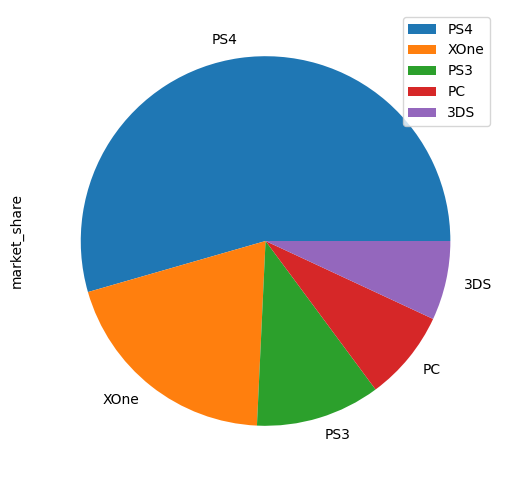

In [48]:
#hallamos las 5 plataformas principales en Europa
df_reg_eu = df_ice.groupby('platform')['eu_sales'].agg({'sum'})
df_reg_eu = df_reg_eu.sort_values(by='sum', ascending=False)
df_reg_eu = df_reg_eu.head()
df_reg_eu['market_share'] = round(df_reg_eu['sum'] / df_reg_eu['sum'].sum(), 2)
print(df_reg_eu)
#graficando la distribución de la cuota de mercado
df_reg_eu.plot.pie(y='market_share', figsize=(18,6))

            sum  market_share
platform                     
3DS       44.24          0.48
PS4       15.02          0.16
PSV       14.54          0.16
PS3       11.22          0.12
WiiU       7.31          0.08


<AxesSubplot: ylabel='market_share'>

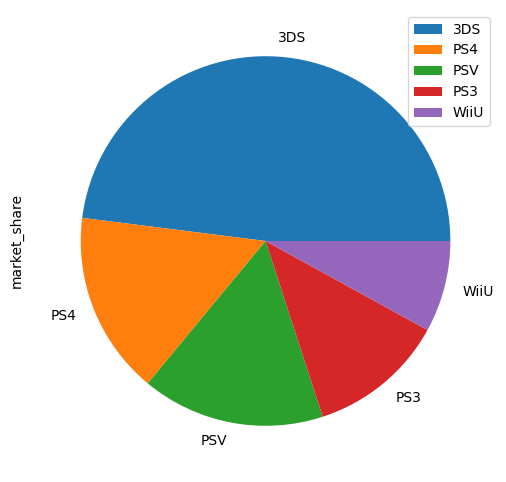

In [49]:
#hallamos las 5 plataformas principales en Japón
df_reg_jp = df_ice.groupby('platform')['jp_sales'].agg({'sum'})
df_reg_jp = df_reg_jp.sort_values(by='sum', ascending=False)
df_reg_jp = df_reg_jp.head()
df_reg_jp['market_share'] = round(df_reg_jp['sum'] / df_reg_jp['sum'].sum(), 2)
print(df_reg_jp)
#graficando la distribución de la cuota de mercado
df_reg_jp.plot.pie(y='market_share', figsize=(18,6), normalize=False)

- La plataforma 'X360' tiene la mayor participación en el mercado en NA, mientras que en EU ocupa un tercer lugar y en JP no aparece dentro de las 5 plataformas principales.
- La plataforma 'PS3' ocupa un segundo lugar en la cuota de mercado en NA, mientras que en EU tiene la mayor cuota de mercado, y en JP ocupa un tercer lugar en cuota de mercado.
- La plataforma 'PS4' tiene el tercer lugar en el mercado de la región NA, en la región EU ocupa el segundo lugar y en JP se lleva la menor cuota de mercado.

Para encontrar los 5 géneros principales, haremos la misma agrupación por `genre`:

                sum
genre              
Shooter       79.02
Action        72.53
Sports        46.13
Role-Playing  33.47
Misc          15.05


<AxesSubplot: ylabel='sum'>

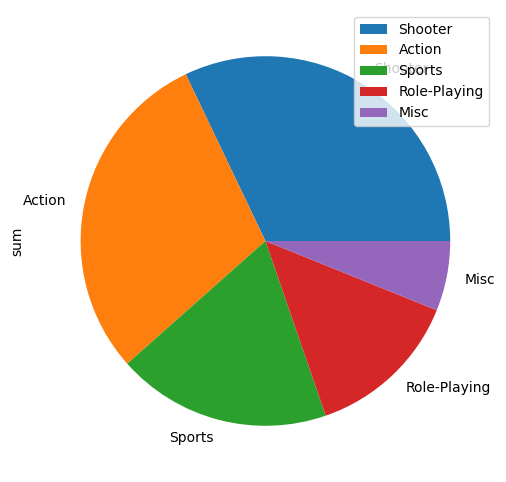

In [50]:
#hallamos las 5 plataformas principales en Norteamérica
df_genre_na = df_ice.groupby('genre')['na_sales'].agg({'sum'})
df_genre_na = df_genre_na.sort_values(by='sum', ascending=False)
df_genre_na = df_genre_na.head()
print(df_genre_na)
#graficando la distribución de los datos
df_genre_na.plot.pie(y='sum', figsize=(18,6))

                sum
genre              
Action        74.68
Shooter       65.52
Sports        45.73
Role-Playing  28.17
Racing        14.13


<AxesSubplot: ylabel='sum'>

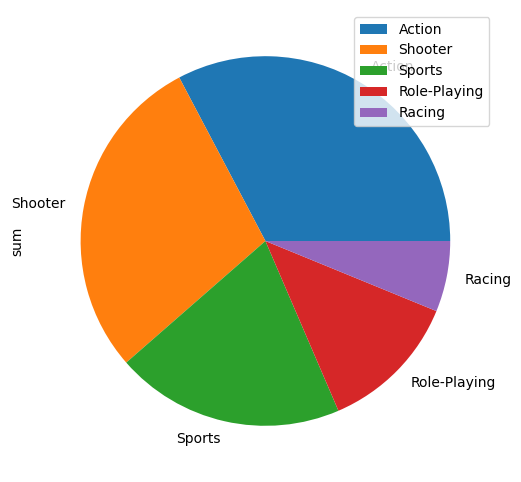

In [51]:
#hallamos las 5 plataformas principales en Europa
df_genre_eu = df_ice.groupby('genre')['eu_sales'].agg({'sum'})
df_genre_eu = df_genre_eu.sort_values(by='sum', ascending=False)
df_genre_eu = df_genre_eu.head()
print(df_genre_eu)
#graficando la distribución de los datos
df_genre_eu.plot.pie(y='sum', figsize=(18,6))

                sum
genre              
Role-Playing  31.16
Action        29.58
Fighting       6.37
Misc           5.61
Shooter        4.87


<AxesSubplot: ylabel='sum'>

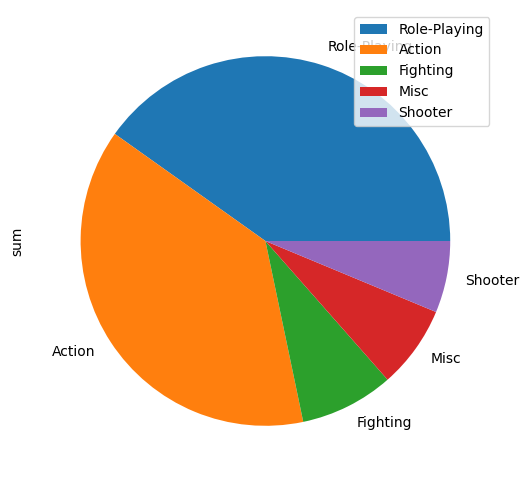

In [52]:
#hallamos las 5 plataformas principales en Japón
df_genre_jp = df_ice.groupby('genre')['jp_sales'].agg({'sum'})
df_genre_jp = df_genre_jp.sort_values(by='sum', ascending=False)
df_genre_jp = df_genre_jp.head()
print(df_genre_jp)
#graficando la distribución de los datos
df_genre_jp.plot.pie(y='sum', figsize=(18,6))

En la región NA como en la región EU, ocupan las mayores cuotas de mercado los mismos géneros de juegos, mientras que en la región JP difieren, ya que el género 'Role-Playing' ocupa la mayor cuota de mercado junto a otros géneros que no aparecen en las regiones NA y EU.

Para saber si las clasificaciones de ESRB afectan a las ventas en regiones individuales, trazaremos diagramas de barras para evaluar las distribuciones.

  rating    sum
2      M  96.42
0      E  50.74
3      T  38.95
1   E10+  33.23


<BarContainer object of 4 artists>

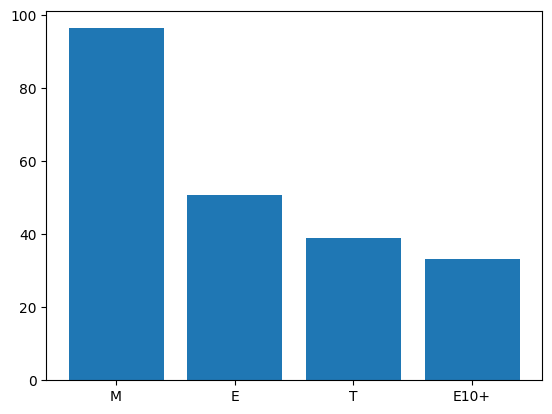

In [53]:
#hallamos la distribución de las ventas en NA según su clasificación ESRB
df_esrb_na = df_ice.groupby('rating')['na_sales'].agg({'sum'}).reset_index()
df_esrb_na = df_esrb_na.sort_values(by='sum', ascending=False)
print(df_esrb_na)
plt.bar(df_esrb_na['rating'], df_esrb_na['sum'])

  rating    sum
2      M  93.44
0      E  58.06
3      T  34.07
1   E10+  26.16


<BarContainer object of 4 artists>

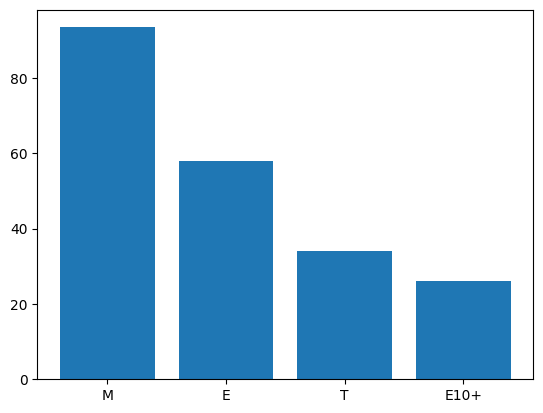

In [54]:
#hallamos la distribución de las ventas en EU según su clasificación ESRB
df_esrb_eu = df_ice.groupby('rating')['eu_sales'].agg({'sum'}).reset_index()
df_esrb_eu = df_esrb_eu.sort_values(by='sum', ascending=False)
print(df_esrb_eu)
plt.bar(df_esrb_eu['rating'], df_esrb_eu['sum'])

  rating    sum
3      T  14.78
0      E   8.94
2      M   8.01
1   E10+   4.46


<BarContainer object of 4 artists>

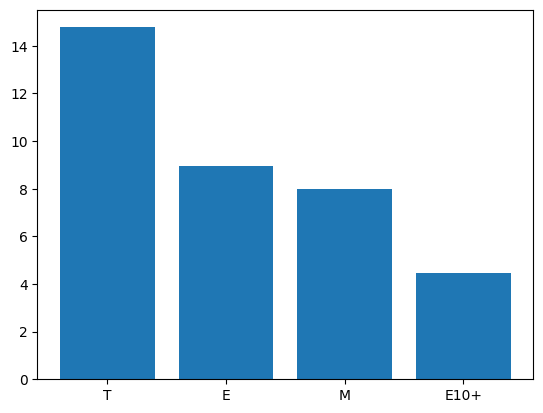

In [55]:
#hallamos la distribución de las ventas en JP según su clasificación ESRB
df_esrb_jp = df_ice.groupby('rating')['jp_sales'].agg({'sum'}).reset_index()
df_esrb_jp = df_esrb_jp.sort_values(by='sum', ascending=False)
print(df_esrb_jp)
plt.bar(df_esrb_jp['rating'], df_esrb_jp['sum'])

Revisando nuestros datos por regiones podemos observar, que si un juego está clasificado con 'EC' o 'RP', al parecer si se verá afectado en las ventas, ya que registran poco o ninguna venta en todas las regiones.

## Etapa 3. Prueba de hipótesis <a id='hypotheses'></a>

### Hipótesis 1 <a id='activity'></a>

La primera hipótesis nos dice que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- El valor alpha se establece en 0.05(nivel crítico de significación estadística).
- La hipótesis nula sería 'las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales'.
- La hipótesis alternativa sería 'las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales'.
- El criterio utilizado para probar la hipótesis es el de la igualdad de las medias de dos poblaciones, ya que contamos con dos poblaciones (usuarios para las plataformas Xbox One y PC).

In [56]:
#quitamos filas en 'user_score' que tienen valores ausentes
df_ice = df_ice.dropna(subset=['user_score'])

In [57]:
array_xone = df_ice[df_ice['platform']=='XOne']['user_score']
array_pc = df_ice[df_ice['platform']=='PC']['user_score']

alpha = 0.05

results_h1 = st.ttest_ind(array_xone, array_pc)

print('p-value:', results_h1.pvalue)

if (results_h1.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.10450507919348415
No rechazamos la hipótesis nula


El análisis para la primera hipótesis sugiere que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

### Hipótesis 2 <a id='week'></a>

La segunda hipótesis nos dice que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- El valor alpha se establece en 0.05(nivel crítico de significación estadística).
- La hipótesis nula sería 'las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales'.
- La hipótesis alternativa sería 'las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales'.
- El criterio utilizado para probar la hipótesis es el de la igualdad de las medias de dos poblaciones, ya que contamos con dos poblaciones (usuarios para los géneros de Acción y Deportes).

In [58]:
array_action = df_ice[df_ice['genre']=='Action']['user_score']
array_sports = df_ice[df_ice['genre']=='Sports']['user_score']

alpha = 0.05

results_h2 = st.ttest_ind(array_action, array_sports)

print('p-value:', results_h2.pvalue)

if (results_h2.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 2.8711147985105864e-19
Rechazamos la hipótesis nula


El análisis para la segunda hipótesis sugiere que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Conclusiones <a id='end'></a>

Durante el proyecto se analizaron  posibles errores en los datos, tales como: valores duplicados, valores ausentes y tipos de datos incorrectos. No se encontraron valores duplicados, pero si valores ausentes en varias columnas, había un gran porcentaje de ausentes en columnas de interés para los análisis, pero que no se podian imputar ya que no se encontraron patrones en los datos, por lo que se optó en dejar en blanco. Con respecto a los tipos de datos necesarios, se corrigieron exitosamente. 

Hemos probado las siguientes hipótesis:
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Traz analizar los datos, concluimos:

1.  El análisis sugiere que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2.  El análisis sugiere que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

También podemos concluir:
- Que si un juego tiene la Clasificación (ESRB) como 'EC' o 'RP', al parecer se verá afectado en las ventas, ya que estas clasificaciones registran poca o ninguna venta en todas las regiones.
- Que los géneros principales son: Action, Shooter, Sports y Role-Playing. Estos géneros no se diferencian en las regiones NA, EU y JP.
- Que las plataformas principales son: PS3, PS4 y 3DS. Estas plataformas ocupan la mayoría de las cuotas de mercado en las distintas regiones.
- Que las plataformas potencialmente rentables para futuras campañas son: PS4 y XOne. Esto se debe a que ambas plataformas se encuentran en su pico de ventas.